# Chapter 6: Multiple Linear Regression

> (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>
> Code included in
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.

Presented and edited by Dillon Orr for University of San Diego, 2022.

## Import required packages

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt

import dmba
from dmba import regressionSummary
from dmba import adjusted_r2_score, AIC_score, BIC_score

%matplotlib inline

## Table 6.3

In [2]:
# Import and reduce data frame to the top 1000 rows
car_df = dmba.load_data('ToyotaCorolla.csv')
car_df = car_df.iloc[0:1000]
display(car_df.columns)

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

In [3]:
# select columns for regression analysis
predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'CC', 
              'Doors', 'Quarterly_Tax', 'Weight']
outcome = 'Price'

# partition data
X = pd.get_dummies(car_df[predictors], drop_first=True)
y = car_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

car_lm = LinearRegression()
car_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', car_lm.intercept_)
display(pd.DataFrame({'Predictor': X.columns, 'coefficient': car_lm.coef_}))

# print performance measures
regressionSummary(train_y, car_lm.predict(train_X))

intercept  -1319.3543800411808


,Predictor,coefficient
0,Age_08_04,-140.748761
1,KM,-0.017840
2,HP,36.103419
3,Met_Color,84.281830
4,Automatic,416.781954
5,CC,0.017737
6,Doors,-50.657863
7,Quarterly_Tax,13.625325
8,Weight,13.038711
9,Fuel_Type_Diesel,1066.464681



Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1400.5823
            Mean Absolute Error (MAE) : 1046.9072
          Mean Percentage Error (MPE) : -1.0223
Mean Absolute Percentage Error (MAPE) : 9.2994


In [4]:
# get predictions based on train_X
pred_y = car_lm.predict(train_X)

#calculate adjusted r2 and information criteria measures
print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, car_lm))
print('AIC : ', AIC_score(train_y, pred_y, car_lm))
print('BIC : ', BIC_score(train_y, pred_y, car_lm))

adjusted r2 :  0.8537958550253093
AIC :  10422.298278332171
BIC :  10479.45836384998


## Table 6.4

In [5]:
# Use predict() to make predictions on a new set
car_lm_pred = car_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': car_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - car_lm_pred})
display(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, car_lm_pred)

,Predicted,Actual,Residual
507,10607.333940,11500,892.666060
818,9272.705792,8950,-322.705792
452,10617.947808,11450,832.052192
368,13600.396275,11450,-2150.396275
242,12396.694660,11950,-446.694660
929,9496.498212,9995,498.501788
262,12480.063217,13500,1019.936783
810,8834.146068,7950,-884.146068
318,12183.361282,9900,-2283.361282
49,19206.965683,21950,2743.034317



Regression statistics

                      Mean Error (ME) : 103.6803
       Root Mean Squared Error (RMSE) : 1312.8523
            Mean Absolute Error (MAE) : 1017.5972
          Mean Percentage Error (MPE) : -0.2633
Mean Absolute Percentage Error (MAPE) : 9.0111


## Figure 6.1
Determine the residuals and create a histogram

0.7425


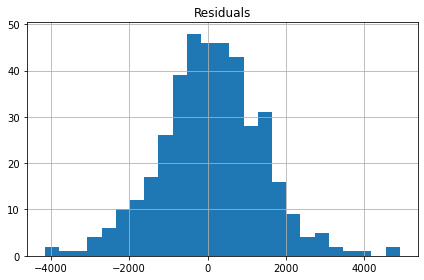

In [6]:
car_lm_pred = car_lm.predict(valid_X)
all_residuals = valid_y - car_lm_pred

# Determine the percentage of datapoints with a residual in [-1406, 1406] = approx. 75\%
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

plt.tight_layout()
plt.show()